In [1]:
## Import Packages
import numpy as np
import _pickle as pk
from matplotlib import pyplot as plt
import matplotlib as mpl

plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
mpl.rc('font',size=40,**{'family':'sans-serif','sans-serif':['Arial']})
%matplotlib inline

In [2]:
Source = '/Volumes/eSSD0/Papers/GMD_CanESM_p1/'

In [3]:
#load in cloud feedbacks and dimensions as needed
Models = ['CanESM2','CanESM5_p2']

data_sw = dict()
data_lw = dict()

data_sw_SR = dict()
data_lw_SR = dict()

for m in range(2):
    
    data_sw_SR[Models[m]] = pk.load(open(Source+\
        'Data/'+Models[m]+'/Fluxes/'+Models[m]+'_TrCLsw_FLUX_FB_SRdecomp_Grid.pi','rb'))
    data_lw_SR[Models[m]] = pk.load(open(Source+\
        'Data/'+Models[m]+'/Fluxes/'+Models[m]+'_TrCLlw_FLUX_FB_SRdecomp_Grid.pi','rb'))
    
    data_sw[Models[m]] = pk.load(open(Source+\
    'Data/'+Models[m]+'/Fluxes/'+Models[m]+'_TrCLsw_FLUX_FB_MZdecomp_Grid.pi','rb'))
    
    data_lw[Models[m]] = pk.load(open(Source+\
    'Data/'+Models[m]+'/Fluxes/'+Models[m]+'_TrCLlw_FLUX_FB_MZdecomp_Grid.pi','rb'))

lat = np.linspace(-87.864,87.864,64)
lon = np.linspace(0,357.1875,128)

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat,(lon.size,1)).T

In [4]:
#take the global, annual mean
data_lw_SRgam = dict()
data_sw_SRgam = dict()
for mods in data_sw_SR.keys():
    data_sw_SRgam[mods] = dict()
    data_lw_SRgam[mods] = dict()
    
    for prop in data_sw_SR[mods].keys():
        data_sw_SRgam[mods][prop] = np.average(data_sw_SR[mods][prop],weights=coslat)
        data_lw_SRgam[mods][prop] = np.average(data_lw_SR[mods][prop],weights=coslat)


#take the global, annual mean
data_lw_gam = dict()
data_sw_gam = dict()
for mods in data_sw.keys():
    data_sw_gam[mods] = dict()
    data_lw_gam[mods] = dict()
    
    for prop in data_sw[mods].keys():
        data_sw_gam[mods][prop] = dict()
        data_lw_gam[mods][prop] = dict()
        
        for ctp in data_sw[mods][prop].keys():
            data_sw_gam[mods][prop][ctp] = np.average(data_sw[mods][prop][ctp],weights=coslat)
            data_lw_gam[mods][prop][ctp] = np.average(data_lw[mods][prop][ctp],weights=coslat)

In [5]:
for mods in data_sw_SR.keys():
    data_sw_SRgam[mods]['Hi_obs'] = data_sw_SRgam[mods]['Low']-data_sw_SRgam[mods]['Low_unobscured']
    data_lw_SRgam[mods]['Hi_obs'] = data_lw_SRgam[mods]['Low']-data_lw_SRgam[mods]['Low_unobscured']

    data_sw_SRgam[mods]['Hi_cor'] = data_sw_SRgam[mods]['Hi']+data_sw_SRgam[mods]['Hi_obs']
    data_lw_SRgam[mods]['Hi_cor'] = data_lw_SRgam[mods]['Hi']+data_lw_SRgam[mods]['Hi_obs']

    
print(data_sw_SRgam['CanESM2'].keys())

dict_keys(['Low', 'Low_unobscured', 'Hi', 'Hi_obs', 'Hi_cor'])


In [6]:
for mods in data_sw_SRgam.keys():
    print(mods)
    for height in data_sw_SRgam[mods].keys():
        if height == 'Low' or height == 'Hi' or height == 'Hi_obs':
            pass
        else:
            print(height, '\n')
            print('SW - ',round(data_sw_SRgam[mods][height],2))
            print('LW - ',round(data_lw_SRgam[mods][height],2))
            print('\n')  

CanESM2
Low_unobscured 

SW -  0.21
LW -  0.01


Hi_cor 

SW -  -0.46
LW -  0.74


CanESM5_p2
Low_unobscured 

SW -  0.42
LW -  -0.03


Hi_cor 

SW -  -0.35
LW -  0.75




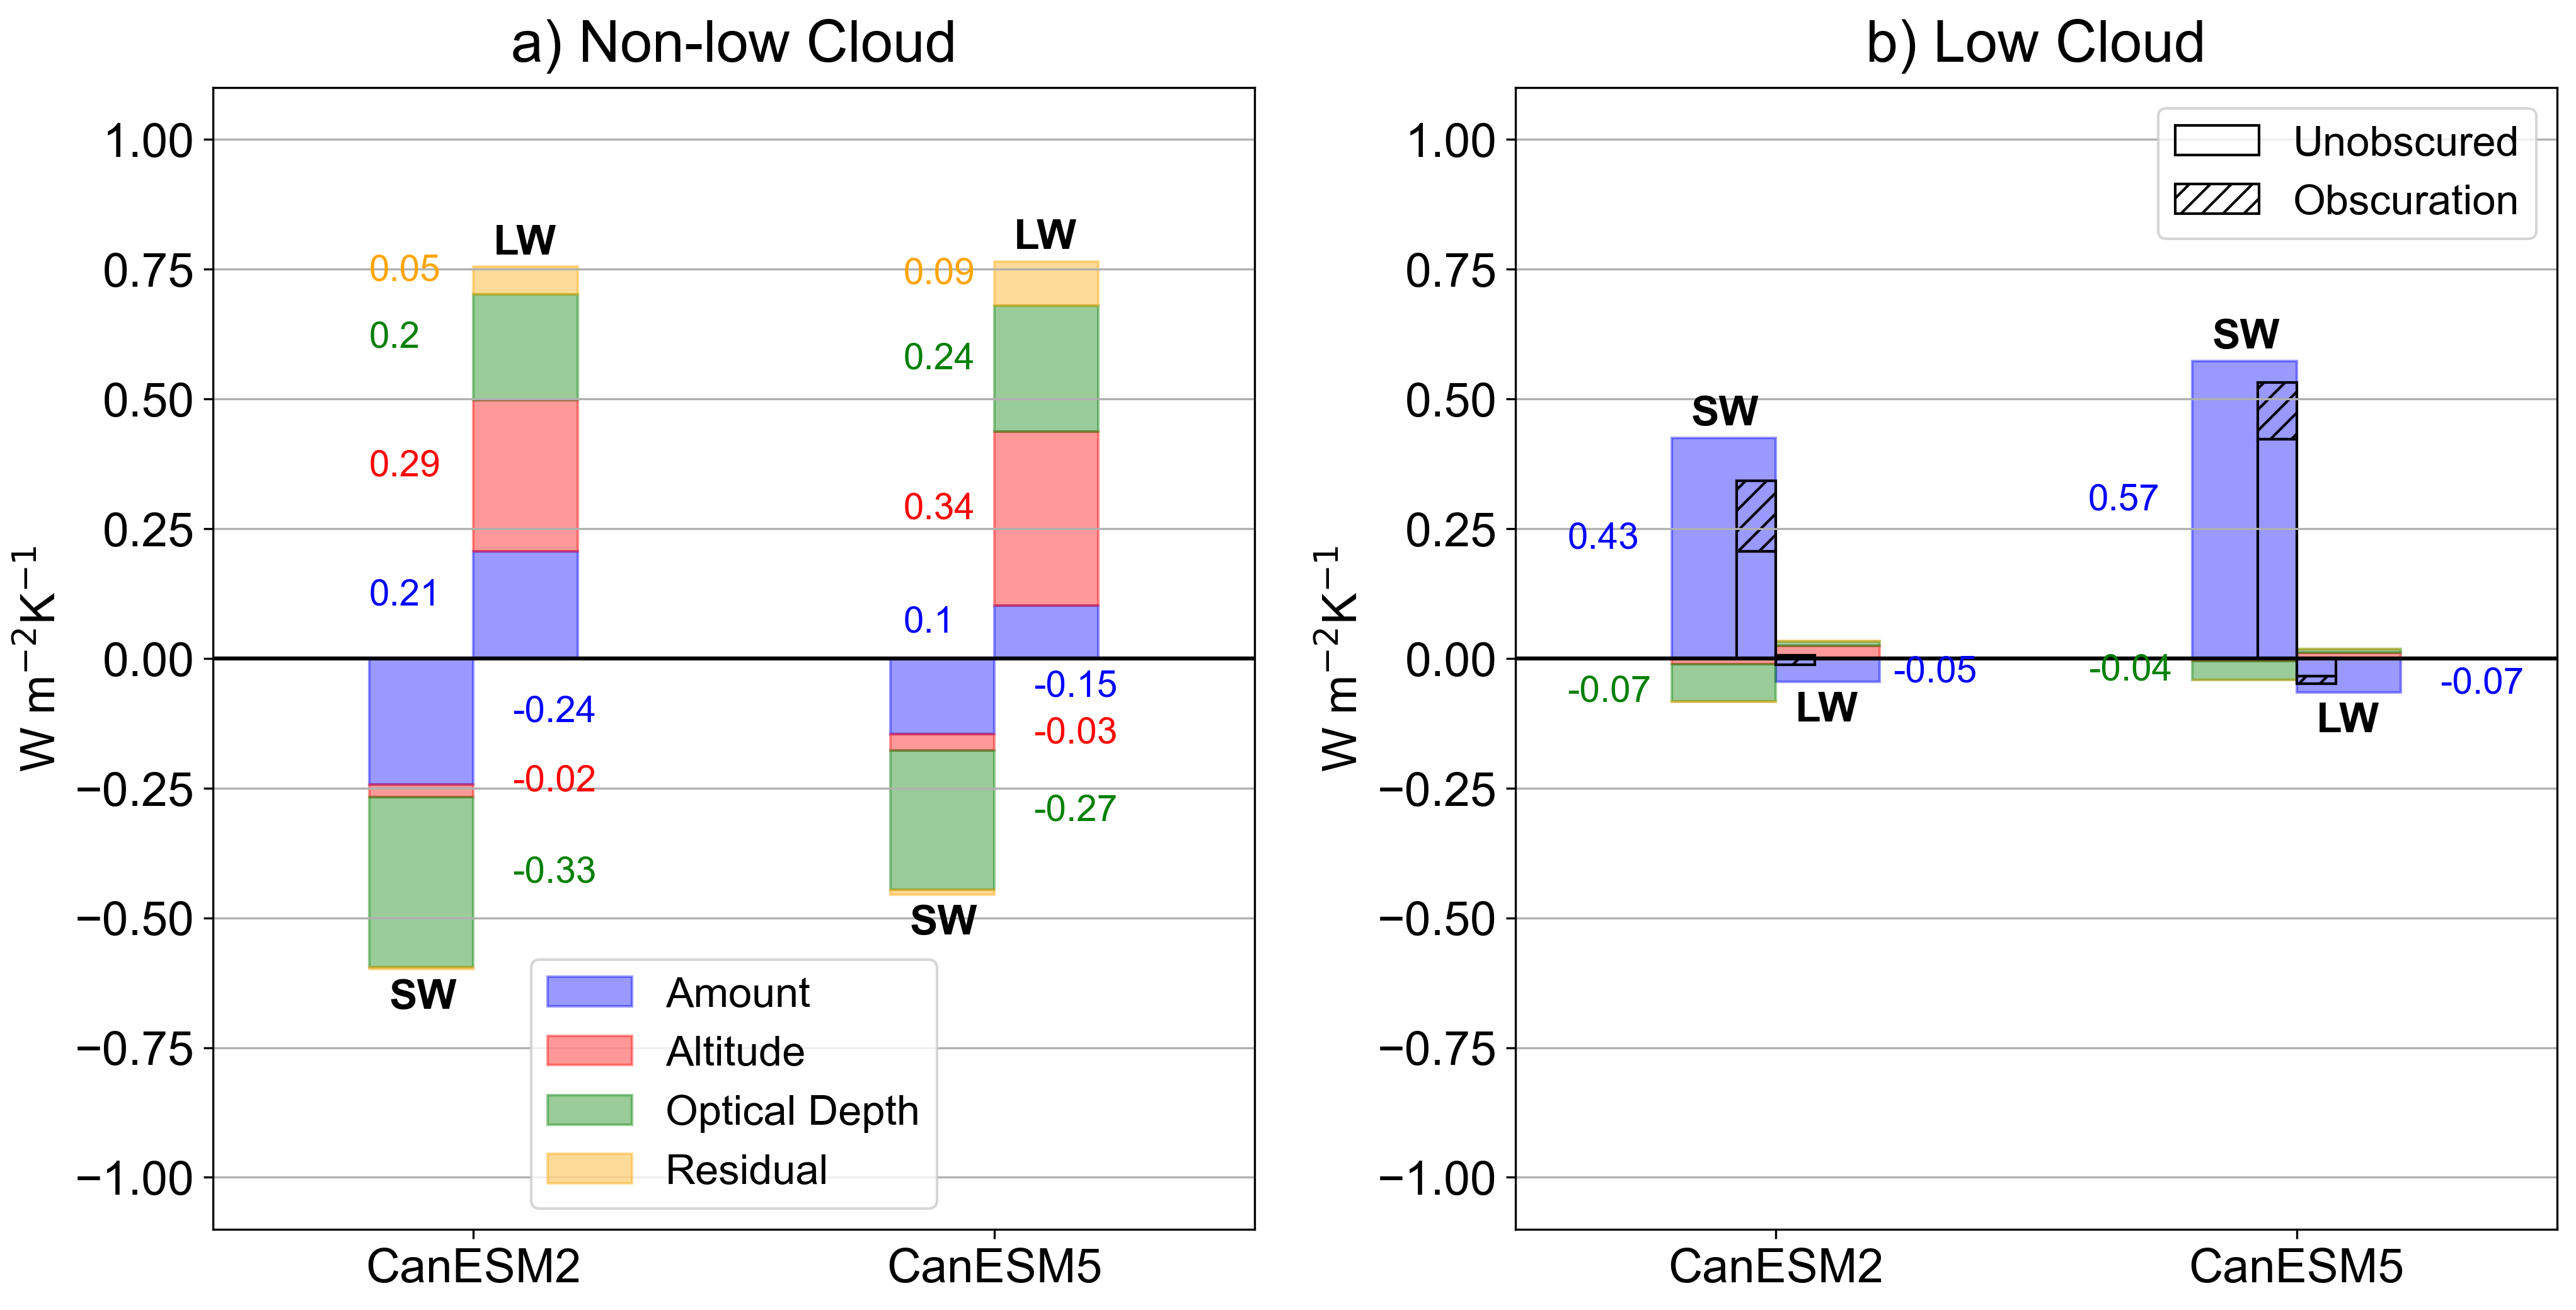

In [13]:
plt.figure(figsize=(16,8),dpi=300)
plt.subplot(121)
#plt.gca().spines['bottom'].set_position(('data',0))
#plt.gca().spines['top'].set_visible(False)
#plt.gca().spines['right'].set_visible(False)
plt.title('a) Non-low Cloud',fontsize=22,pad=10)
#CanESM2

#amount
plt.bar(1,data_lw_gam['CanESM2']['Amount']['Hi'],align='edge',width=0.4,color='blue',\
        alpha=0.4,edgecolor='blue',label='Amount')
plt.text(0.60,data_lw_gam['CanESM2']['Amount']['Hi']/2,\
         str(round(data_lw_gam['CanESM2']['Amount']['Hi'],2)),color='blue',fontsize=14)
#plt.text(0.60,(data_lw_gam['CanESM2']['Amount']['Hi']/2)-0.05,\
#         '(-0.11)',color='k',fontsize=14)
plt.bar(1,data_sw_gam['CanESM2']['Amount']['Hi'],align='edge',width=-0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(1.15,data_sw_gam['CanESM2']['Amount']['Hi']/2,\
         str(round(data_sw_gam['CanESM2']['Amount']['Hi'],2)),color='blue',fontsize=14)
#plt.text(1.15,(data_sw_gam['CanESM2']['Amount']['Hi']/2)-0.05,\
#         '(0.12)',color='k',fontsize=14)

#altitude
plt.bar(1,data_lw_gam['CanESM2']['Altitude']['Hi'],align='edge',width=0.4,\
        bottom=data_lw_gam['CanESM2']['Amount']['Hi'],\
        color='red',alpha=0.4,edgecolor='red',label='Altitude')
plt.text(0.60,data_lw_gam['CanESM2']['Amount']['Hi']+(data_lw_gam['CanESM2']['Altitude']['Hi']/2),str(round(data_lw_gam['CanESM2']['Altitude']['Hi'],2)),color='red',fontsize=14)
#plt.text(0.70,(data_lw_gam['CanESM2']['Amount']['Hi']+(data_lw_gam['CanESM2']['Altitude']['Hi']/2))-0.05,\
#         '(0.22)',color='k')
plt.bar(1,data_sw_gam['CanESM2']['Altitude']['Hi'],align='edge',width=-0.4,\
        bottom=data_sw_gam['CanESM2']['Amount']['Hi'],\
        color='red',alpha=0.4,edgecolor='red')
plt.text(1.15,data_sw_gam['CanESM2']['Amount']['Hi']+(data_sw_gam['CanESM2']['Altitude']['Hi']/2),str(round(data_sw_gam['CanESM2']['Altitude']['Hi'],2)),color='red',fontsize=14)
#plt.text(1.05,data_sw_gam['CanESM2']['Amount']['Hi']+(data_sw_gam['CanESM2']['Altitude']['Hi']/3),\
#         '(-0.02)',color='k')

#optical depth
plt.bar(1,data_lw_gam['CanESM2']['Optical Depth']['Hi'],align='edge',width=0.4,\
        bottom=\
    data_lw_gam['CanESM2']['Altitude']['Hi']+data_lw_gam['CanESM2']['Amount']['Hi'],\
        color='green',alpha=0.4,edgecolor='green',label='Optical Depth')
plt.text(0.60,data_lw_gam['CanESM2']['Amount']['Hi']+data_lw_gam['CanESM2']['Altitude']['Hi']+(data_lw_gam['CanESM2']['Optical Depth']['Hi']/2),\
        str(round(data_lw_gam['CanESM2']['Optical Depth']['Hi'],2)),color='green',fontsize=14)
#plt.text(0.60,(data_lw_gam['CanESM2']['Amount']['Hi']+data_lw_gam['CanESM2']['Altitude']['Hi']+\
#         (data_lw_gam['CanESM2']['Optical Depth']['Hi']/2))-0.05,\
#         '(0.11)',color='k')
plt.bar(1,data_sw_gam['CanESM2']['Optical Depth']['Hi'],align='edge',width=-0.4,\
        bottom=\
    data_sw_gam['CanESM2']['Altitude']['Hi']+data_sw_gam['CanESM2']['Amount']['Hi'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(1.15,data_sw_gam['CanESM2']['Amount']['Hi']+data_sw_gam['CanESM2']['Altitude']['Hi']+\
         (data_sw_gam['CanESM2']['Optical Depth']['Hi']/2),\
         str(round(data_sw_gam['CanESM2']['Optical Depth']['Hi'],2)),color='green',fontsize=14)
#plt.text(1.15,(data_sw_gam['CanESM2']['Amount']['Hi']+data_sw_gam['CanESM2']['Altitude']['Hi']+\
#         (data_sw_gam['CanESM2']['Optical Depth']['Hi']/2))-0.05,\
#         '(-0.13)',color='k')

#Residual
plt.bar(1,data_lw_gam['CanESM2']['Residual']['Hi'],align='edge',width=0.4,\
        bottom=data_lw_gam['CanESM2']['Altitude']['Hi']+\
        data_lw_gam['CanESM2']['Amount']['Hi']+data_lw_gam['CanESM2']['Optical Depth']['Hi'],\
        color='orange',alpha=0.4,edgecolor='orange',label='Residual')
plt.text(0.6,data_lw_gam['CanESM2']['Amount']['Hi']+data_lw_gam['CanESM2']['Altitude']['Hi']+data_lw_gam['CanESM2']['Optical Depth']['Hi']+(data_lw_gam['CanESM2']['Residual']['Hi']/2),str(round(data_lw_gam['CanESM2']['Residual']['Hi'],2)),color='orange',fontsize=14)

plt.bar(1,data_sw_gam['CanESM2']['Residual']['Hi'],align='edge',width=-0.4,\
        bottom=data_sw_gam['CanESM2']['Altitude']['Hi']+\
        data_sw_gam['CanESM2']['Amount']['Hi']+data_sw_gam['CanESM2']['Optical Depth']['Hi'],\
        color='orange',alpha=0.4,edgecolor='orange')
#plt.text(1.01,data_sw_gam['CanESM2']['Amount']['Hi']+data_sw_gam['CanESM2']['Altitude']['Hi']+\
#         data_sw_gam['CanESM2']['Optical Depth']['Hi']+\
#         (data_sw_gam['CanESM2']['Residual']['Hi']/2),\
#         str(round(data_sw_gam['CanESM2']['Residual']['Hi'],2)),color='orange')


#amount
plt.bar(3,data_lw_gam['CanESM5_p2']['Amount']['Hi'],align='edge',width=0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(2.65,data_lw_gam['CanESM5_p2']['Amount']['Hi']/2,\
         str(round(data_lw_gam['CanESM5_p2']['Amount']['Hi'],2)),color='blue',fontsize=14)
plt.bar(3,data_sw_gam['CanESM5_p2']['Amount']['Hi'],align='edge',width=-0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(3.15,data_sw_gam['CanESM5_p2']['Amount']['Hi']/2,\
         str(round(data_sw_gam['CanESM5_p2']['Amount']['Hi'],2)),color='blue',fontsize=14)

#altitude
plt.bar(3,data_lw_gam['CanESM5_p2']['Altitude']['Hi'],align='edge',width=0.4,\
        bottom=data_lw_gam['CanESM5_p2']['Amount']['Hi'],\
        color='red',alpha=0.4,edgecolor='red')
plt.text(2.65,data_lw_gam['CanESM5_p2']['Amount']['Hi']+(data_lw_gam['CanESM5_p2']['Altitude']['Hi']/2),str(round(data_lw_gam['CanESM5_p2']['Altitude']['Hi'],2)),\
        color='red',fontsize=14)
plt.bar(3,data_sw_gam['CanESM5_p2']['Altitude']['Hi'],align='edge',width=-0.4,\
        bottom=data_sw_gam['CanESM5_p2']['Amount']['Hi'],\
        color='red',alpha=0.4,edgecolor='red')
plt.text(3.15,data_sw_gam['CanESM5_p2']['Amount']['Hi']+(data_sw_gam['CanESM5_p2']['Altitude']['Hi']/2),str(round(data_sw_gam['CanESM5_p2']['Altitude']['Hi'],2)),\
        color='red',fontsize=14)

#optical depth
plt.bar(3,data_lw_gam['CanESM5_p2']['Optical Depth']['Hi'],align='edge',width=0.4,\
        bottom=\
    data_lw_gam['CanESM5_p2']['Altitude']['Hi']+data_lw_gam['CanESM5_p2']['Amount']['Hi'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(2.65,data_lw_gam['CanESM5_p2']['Amount']['Hi']+data_lw_gam['CanESM5_p2']['Altitude']['Hi']+(data_lw_gam['CanESM5_p2']['Optical Depth']['Hi']/2),\
         str(round(data_lw_gam['CanESM5_p2']['Optical Depth']['Hi'],2)),color='green',fontsize=14)
plt.bar(3,data_sw_gam['CanESM5_p2']['Optical Depth']['Hi'],align='edge',width=-0.4,\
        bottom=\
    data_sw_gam['CanESM5_p2']['Altitude']['Hi']+data_sw_gam['CanESM5_p2']['Amount']['Hi'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(3.15,data_sw_gam['CanESM5_p2']['Amount']['Hi']+data_sw_gam['CanESM5_p2']['Altitude']['Hi']+(data_sw_gam['CanESM5_p2']['Optical Depth']['Hi']/2),\
         str(round(data_sw_gam['CanESM5_p2']['Optical Depth']['Hi'],2)),color='green',fontsize=14)

#Residual
plt.bar(3,data_lw_gam['CanESM5_p2']['Residual']['Hi'],align='edge',width=0.4,\
        bottom=data_lw_gam['CanESM5_p2']['Altitude']['Hi']+\
        data_lw_gam['CanESM5_p2']['Amount']['Hi']+data_lw_gam['CanESM5_p2']['Optical Depth']['Hi'],\
        color='orange',alpha=0.4,edgecolor='orange')
plt.text(2.65,data_lw_gam['CanESM5_p2']['Amount']['Hi']+data_lw_gam['CanESM5_p2']['Altitude']['Hi']+data_lw_gam['CanESM5_p2']['Optical Depth']['Hi']+\
         (data_lw_gam['CanESM5_p2']['Residual']['Hi']/2),\
         str(round(data_lw_gam['CanESM5_p2']['Residual']['Hi'],2)),color='orange',fontsize=14)
plt.bar(3,data_sw_gam['CanESM5_p2']['Residual']['Hi'],align='edge',width=-0.4,\
        bottom=data_sw_gam['CanESM5_p2']['Altitude']['Hi']+\
        data_sw_gam['CanESM5_p2']['Amount']['Hi']+data_sw_gam['CanESM5_p2']['Optical Depth']['Hi'],\
        color='orange',alpha=0.4,edgecolor='orange')
#plt.text(3.01,data_sw_gam['CanESM5_p2']['Amount']['Hi']+data_sw_gam['CanESM5_p2']['Altitude']['Hi']+\
#         data_sw_gam['CanESM5_p2']['Optical Depth']['Hi']+\
#         (data_sw_gam['CanESM5_p2']['Residual']['Hi']/2),\
#         str(round(data_sw_gam['CanESM5_p2']['Residual']['Hi'],2)),color='orange')

plt.xlim(0,4)
plt.axhline(0,color='k')
plt.xticks([1,3],labels=['CanESM2','CanESM5'],fontsize=18)
plt.ylabel('W m$^{-2}$K$^{-1}$',fontsize=18)
plt.ylim(-1.1,1.1)
plt.yticks(fontsize=18)
plt.legend(loc='lower center',fontsize=16)

plt.text(0.675,data_sw_gam['CanESM2']['Sum']['Hi']-0.075,'SW',color='k',fontweight='bold',fontsize=16)
plt.text(1.075,data_lw_gam['CanESM2']['Sum']['Hi']+0.025,'LW',color='k',fontweight='bold',fontsize=16)

plt.text(2.675,data_sw_gam['CanESM5_p2']['Sum']['Hi']-0.075,'SW',color='k',fontweight='bold',fontsize=16)
plt.text(3.075,data_lw_gam['CanESM5_p2']['Sum']['Hi']+0.025,'LW',color='k',fontweight='bold',fontsize=16)

plt.grid(axis='y')
#plt.axhline(0,color='k')
#------------
#SHORTWAVE
#------------
plt.subplot(122)
#plt.gca().spines['bottom'].set_position(('data',0))
#plt.gca().spines['top'].set_visible(False)
#plt.gca().spines['right'].set_visible(False)
plt.title('b) Low Cloud',fontsize=22,pad=10)

#amount
plt.bar(1,data_lw_gam['CanESM2']['Amount']['Low'],align='edge',width=0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(1.45,data_lw_gam['CanESM2']['Amount']['Low'],\
         str(round(data_lw_gam['CanESM2']['Amount']['Low'],2)),color='blue',fontsize=14)
#plt.text(1.45,(data_lw_gam['CanESM2']['Amount']['Low'])-0.05,\
#         '(-0.04)',color='k')
plt.bar(1,data_sw_gam['CanESM2']['Amount']['Low'],align='edge',width=-0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(0.2,data_sw_gam['CanESM2']['Amount']['Low']/2,\
         str(round(data_sw_gam['CanESM2']['Amount']['Low'],2)),color='blue',fontsize=14)
#plt.text(0.3,(data_sw_gam['CanESM2']['Amount']['Low']/2)-0.05,\
#         '(0.39)',color='k')

#altitude
plt.bar(1,data_lw_gam['CanESM2']['Altitude']['Low'],align='edge',width=0.4,\
        color='red',alpha=0.4,edgecolor='red')
#plt.text(1.45,data_lw_gam['CanESM2']['Altitude']['Low'],\
#         str(round(data_lw_gam['CanESM2']['Altitude']['Low'],2)),color='red')
plt.bar(1,data_sw_gam['CanESM2']['Altitude']['Low'],align='edge',width=-0.4,\
        color='red',alpha=0.4,edgecolor='red')
#plt.text(0.2,-0.04,\
#         str(round(data_sw_gam['CanESM2']['Altitude']['Low']/2,2)),color='red')

#optical depth
plt.bar(1,data_lw_gam['CanESM2']['Optical Depth']['Low'],align='edge',width=0.4,\
        bottom=\
    data_lw_gam['CanESM2']['Altitude']['Low'],\
        color='green',alpha=0.4,edgecolor='green')
#plt.text(1.45,0.07,\
#         str(round(data_lw_gam['CanESM2']['Optical Depth']['Low'],2)),color='green')
plt.bar(1,data_sw_gam['CanESM2']['Optical Depth']['Low'],align='edge',width=-0.4,\
        bottom=\
    data_sw_gam['CanESM2']['Altitude']['Low'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(0.2,data_sw_gam['CanESM2']['Altitude']['Low']+\
         (data_sw_gam['CanESM2']['Optical Depth']['Low']),\
         str(round(data_sw_gam['CanESM2']['Optical Depth']['Low'],2)),color='green',fontsize=14)
#plt.text(0.30,(data_sw_gam['CanESM2']['Altitude']['Low']+\
#         (data_sw_gam['CanESM2']['Optical Depth']['Low']))-0.05,\
#         '(-0.12)',color='k')

#Residual
plt.bar(1,data_lw_gam['CanESM2']['Residual']['Low'],align='edge',width=0.4,\
        bottom=data_lw_gam['CanESM2']['Altitude']['Low']+\
        data_lw_gam['CanESM2']['Optical Depth']['Low'],\
        color='orange',alpha=0.4,edgecolor='orange')
#plt.text(1.45,0.12,\
#         str(round(data_lw_gam['CanESM2']['Residual']['Low'],2)),color='orange')
plt.bar(1,data_sw_gam['CanESM2']['Residual']['Low'],align='edge',width=-0.4,\
        bottom=data_sw_gam['CanESM2']['Altitude']['Low']+\
        data_sw_gam['CanESM2']['Optical Depth']['Low'],\
        color='orange',alpha=0.4,edgecolor='orange')
#plt.text(0.2,-0.13,\
#         str(round(data_sw_gam['CanESM2']['Residual']['Low'],2)),color='orange')

#CanESM5
#amount
plt.bar(3,data_lw_gam['CanESM5_p2']['Amount']['Low'],align='edge',width=0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(3.55,data_lw_gam['CanESM5_p2']['Amount']['Low'],\
         str(round(data_lw_gam['CanESM5_p2']['Amount']['Low'],2)),color='blue',fontsize=14)
plt.bar(3,data_sw_gam['CanESM5_p2']['Amount']['Low'],align='edge',width=-0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(2.2,data_sw_gam['CanESM5_p2']['Amount']['Low']/2,\
         str(round(data_sw_gam['CanESM5_p2']['Amount']['Low'],2)),color='blue',fontsize=14)

#altitude
plt.bar(3,data_lw_gam['CanESM5_p2']['Altitude']['Low'],align='edge',width=0.4,\
        color='red',alpha=0.4,edgecolor='red',)
#plt.text(3.45,data_lw_gam['CanESM5_p2']['Altitude']['Low'],\
#         str(round(data_lw_gam['CanESM5_p2']['Altitude']['Low'],2)),color='red')
plt.bar(3,data_sw_gam['CanESM5_p2']['Altitude']['Low'],align='edge',width=-0.4,\
        color='red',alpha=0.4,edgecolor='red')
#plt.text(2.35,-0.04,\
#         str(round(data_sw_gam['CanESM5_p2']['Altitude']['Low']/2,2)),color='red')

#optical depth
plt.bar(3,data_lw_gam['CanESM5_p2']['Optical Depth']['Low'],align='edge',width=0.4,\
        bottom=\
    data_lw_gam['CanESM5_p2']['Altitude']['Low'],\
        color='green',alpha=0.4,edgecolor='green')
#plt.text(3.35,0.07,\
#         str(round(data_lw_gam['CanESM5_p2']['Optical Depth']['Low'],2)),color='green')
plt.bar(3,data_sw_gam['CanESM5_p2']['Optical Depth']['Low'],align='edge',width=-0.4,\
        bottom=\
    data_sw_gam['CanESM5_p2']['Altitude']['Low'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(2.2,data_sw_gam['CanESM5_p2']['Altitude']['Low']+\
         (data_sw_gam['CanESM5_p2']['Optical Depth']['Low']),\
         str(round(data_sw_gam['CanESM5_p2']['Optical Depth']['Low'],2)),color='green',fontsize=14)

#Residual
plt.bar(3,data_lw_gam['CanESM5_p2']['Residual']['Low'],align='edge',width=0.4,\
        bottom=data_lw_gam['CanESM5_p2']['Altitude']['Low']+\
        data_lw_gam['CanESM5_p2']['Optical Depth']['Low'],\
        color='orange',alpha=0.4,edgecolor='orange')
#plt.text(3.45,0.12,\
#         str(round(data_lw_gam['CanESM5_p2']['Residual']['Low'],2)),color='orange')
plt.bar(3,data_sw_gam['CanESM5_p2']['Residual']['Low'],align='edge',width=-0.4,\
        bottom=data_sw_gam['CanESM5_p2']['Altitude']['Low']+\
        data_sw_gam['CanESM5_p2']['Optical Depth']['Low'],\
        color='orange',alpha=0.4,edgecolor='orange')



#Obscuration plots 
plt.bar(3,data_sw_SRgam['CanESM5_p2']['Low_unobscured'],align='edge',width=-0.15,\
        color='None',edgecolor='k')
plt.bar(3,data_sw_SRgam['CanESM5_p2']['Hi_obs'],align='edge',width=-0.15,hatch='///',\
        bottom=data_sw_SRgam['CanESM5_p2']['Low_unobscured'],color='None',edgecolor='k')

plt.bar(1,data_sw_SRgam['CanESM2']['Low_unobscured'],align='edge',width=-0.15,\
        color='None',edgecolor='k')
plt.bar(1,data_sw_SRgam['CanESM2']['Hi_obs'],align='edge',width=-0.15,hatch='///',\
        bottom=data_sw_SRgam['CanESM2']['Low_unobscured'],color='None',edgecolor='k')

plt.bar(3,data_lw_SRgam['CanESM5_p2']['Low_unobscured'],align='edge',width=0.15,\
        color='None',edgecolor='k')
plt.bar(3,data_lw_SRgam['CanESM5_p2']['Hi_obs'],align='edge',width=0.15,hatch='///',\
        bottom=data_lw_SRgam['CanESM5_p2']['Low_unobscured'],color='None',edgecolor='k')

plt.bar(1,data_lw_SRgam['CanESM2']['Low_unobscured'],align='edge',width=0.15,\
        color='None',edgecolor='k',label='Unobscured')
plt.bar(1,data_lw_SRgam['CanESM2']['Hi_obs'],align='edge',width=0.15,hatch='///',\
        bottom=data_lw_SRgam['CanESM2']['Low_unobscured'],color='None',edgecolor='k',\
        label='Obscuration')

plt.xlim(0,4)
plt.axhline(0,color='k')
plt.xticks([1,3],labels=['CanESM2','CanESM5'],fontsize=18)
plt.ylabel('W m$^{-2}$K$^{-1}$',fontsize=18)
plt.ylim(-1.1,1.1)
plt.yticks(fontsize=18)
plt.grid(axis='y')
plt.legend(fontsize=16)
#plt.axhline(0,color='k')

plt.text(0.675,data_sw_gam['CanESM2']['Amount']['Low']+0.025,'SW',color='k',fontweight='bold',fontsize=16)
plt.text(1.075,data_lw_gam['CanESM2']['Amount']['Low']-0.075,'LW',color='k',fontweight='bold',fontsize=16)

plt.text(2.675,data_sw_gam['CanESM5_p2']['Amount']['Low']+0.025,'SW',color='k',fontweight='bold',fontsize=16)
plt.text(3.075,data_lw_gam['CanESM5_p2']['Amount']['Low']-0.075,'LW',color='k',fontweight='bold',fontsize=16)

plt.subplots_adjust(wspace=0.25)

plt.savefig('CLD_FB_MZDecomp_GAM_Bar.png',bbox_inches='tight')